In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [3]:
coffee_df = pd.read_csv('dataset/coffee.csv')

In [4]:
coffee_df.head()
coffee_df.dtypes

,Region,Place name,Place type,Rating,Reviews,Price,Delivery option,Dine in option,Takeout option
0,C,Dim Kavu,Others,4.6,206.0,$$,False,NaN,NaN
1,C,Коферум,Cafe,5.0,24.0,$$,False,NaN,True
2,C,Кофейня Світ Чаю,Coffee shop,5.0,11.0,$$,False,NaN,True
3,C,Кофейня Starcoff,Coffee shop,4.4,331.0,$$,False,True,True
4,C,"Кофейня ""Friend Zone""",Coffee shop,5.0,12.0,$$,False,True,True


Region              object
Place name          object
Place type          object
Rating             float64
Reviews            float64
Price               object
Delivery option       bool
Dine in option      object
Takeout option      object
dtype: object

In [5]:
coffee_df['Region'].unique()
coffee_df['Region'].value_counts()
coffee_df['Region'].isna().sum()

array(['C', 'J', 'F', 'B', 'A', 'E', 'D', 'G', 'I', 'H'], dtype=object)

C    20
J    20
F    20
B    20
A    20
E    20
D    20
G    20
I    20
H    20
Name: Region, dtype: int64

0

In [6]:
len(coffee_df['Place name'].unique())
coffee_df['Place name'].value_counts()
coffee_df['Place name'].isna().sum()

187

Dim Kavy                      4
coffee House                  3
Coffee House                  3
MY COFFEE                     2
Lviv Coffee Manufacture       2
                             ..
The Boiler Room               1
Интернет-магазин "Kava-e"     1
Jays : Coffee Brewers         1
Caffisimo                     1
О...МАРАТ КАФЕ ПП ПОЛІСТЕП    1
Name: Place name, Length: 187, dtype: int64

0

In [7]:
len(coffee_df['Place type'].unique())
coffee_df['Place type'].value_counts()
coffee_df['Place type'].isna().sum()

4

Coffee shop     97
Cafe            58
Others          25
Espresso bar    20
Name: Place type, dtype: int64

0

In [8]:
len(coffee_df['Rating'].unique())
coffee_df['Rating'].value_counts()
coffee_df['Rating'].isna().sum()

13

4.6    47
4.7    39
4.9    25
4.5    22
5.0    21
4.8    18
4.4    12
4.3     6
4.2     2
4.1     2
4.0     2
3.9     2
Name: Rating, dtype: int64

2

In [9]:
len(coffee_df['Reviews'].unique())
coffee_df['Reviews'].value_counts()
coffee_df['Reviews'].isna().sum()

164

10.0     5
15.0     4
18.0     4
14.0     3
26.0     3
        ..
440.0    1
488.0    1
807.0    1
837.0    1
599.0    1
Name: Reviews, Length: 163, dtype: int64

2

In [10]:
len(coffee_df['Price'].unique())
coffee_df['Price'].value_counts()
coffee_df['Price'].isna().sum()

3

$$     194
$$$      4
$        2
Name: Price, dtype: int64

0

In [11]:
len(coffee_df['Delivery option'].unique())
coffee_df['Delivery option'].value_counts()
coffee_df['Delivery option'].isna().sum()

2

False    165
True      35
Name: Delivery option, dtype: int64

0

In [12]:
coffee_df['Dine in option'].unique()
coffee_df['Dine in option'].value_counts()
coffee_df['Dine in option'].isna().sum()
coffee_df['Dine in option'].dtype
60/(60+140)

array([nan, True], dtype=object)

True    140
Name: Dine in option, dtype: int64

60

dtype('O')

0.3

In [13]:
coffee_df['Takeout option'].unique()
coffee_df['Takeout option'].value_counts()
coffee_df['Takeout option'].isna().sum()
coffee_df['Takeout option'].dtype
56/(56+144)

array([nan, True], dtype=object)

True    144
Name: Takeout option, dtype: int64

56

dtype('O')

0.28

## 1 (a - b) Checking the values of each column
| Column Name | Expected Value Type | Observed Value Type | Assessment | No. Missing Values | Remark |
|:---------:|:-------------------:|:-------------------:|:-------------:|:---------:|:-------:|
| Region | Nominal | Nominal | Matches | 0 | Can be converted to categorical dtype for efficiency |
| Place name | Nominal | Nominal | Matches | 0 | |
| Place type | Nominal | Nominal | Matches | 0 | Can be converted to categorical dtype
| Rating | Ordinal | Ordinal | Matches | 2 | |
| Reviews | Nominal | Ordinal | Not a match | 2 | |
| Price | Ordinal | Ordinal | Matches | 0 | Can be converted to categorical dtype |
| Delivery Option | Nominal | Nominal | Matches | 0 | |
| Dine In Option | Nominal | Nominal | Matches | 60 | Covert to bool dtype |
| Takeaway Option | Nominal | Nominal | Matches | 56 | Convert to bool dtype|

### Summary
#### Here are the findings after observation
- The Reviews column did not match the given description
- Both Reviews and Rating columns had 2 missing values each
- The Dine In and Takeaway columns have ~30% of values missing while all non-missing values are True. This is likely due to customers simply leaving the selection blank  

## 1 (c) Cleaning the data
- Filling missing values:
    + Missing values in **Rating** column were filled with **_0_**
    + Missing values in **Dine in** and **Takeaway** columns were filled with **_False_**
    + Missing values in **Reviews** column were filled with the median value from the non-missing values
    + **Region**, **Place type**, and **Price** columns were converted to the Pandas <u>**_categorical_**</u> dtype
    + All other columns were left 
    
    ### **NB**: 
    With the Reviews column, including the missing values (NaN set to 0) in the initial computation of the median 
    results in slightly different medians for the cleaned and uncleaned datasets. 
    
    Dropping the missing values before computation results in the same median values for both datasets. 
    
    Therefore it is recommended to drop the missing values before computation.

In [14]:
coffee_cleaned = pd.DataFrame(columns=coffee_df.columns)
coffee_cleaned

,Region,Place name,Place type,Rating,Reviews,Price,Delivery option,Dine in option,Takeout option


In [15]:
# Converting Region column to categorical dtype
coffee_cleaned['Region'] = coffee_df['Region'].astype('category')
coffee_cleaned['Region'].dtype

# Converting Place type column to categorical dtype
coffee_cleaned['Place type'] = coffee_df['Place type'].astype('category')
coffee_cleaned['Place type'].dtype

# Converting Price type to categorical dtype
coffee_cleaned['Price'] = coffee_df['Price'].astype('category')
coffee_cleaned['Price'] = coffee_cleaned['Price'].cat.set_categories(['$','$$','$$$'], ordered=True)
coffee_cleaned['Price'].dtype

# Rating column has two missing values. Replace with 0
coffee_df[coffee_df['Rating'].isna()]
coffee_cleaned['Rating'] = coffee_df['Rating'].fillna(0)
coffee_cleaned['Rating'].isna().sum()


CategoricalDtype(categories=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'], ordered=False)

CategoricalDtype(categories=['Cafe', 'Coffee shop', 'Espresso bar', 'Others'], ordered=False)

CategoricalDtype(categories=['$', '$$', '$$$'], ordered=True)

,Region,Place name,Place type,Rating,Reviews,Price,Delivery option,Dine in option,Takeout option
49,F,Кофе В Херсоне,Cafe,NaN,NaN,$$,False,NaN,NaN
186,H,"Coffee&Cake, Game zone PS4",Coffee shop,NaN,NaN,$$,False,NaN,NaN


0

In [16]:
# Reviews column has two missing values. Replace with median value
coffee_df[coffee_df['Reviews'].isna()]
coffee_df['Reviews'].dtype
reviews_median = np.median(coffee_df['Reviews'].dropna())
coffee_cleaned['Reviews'] = coffee_df['Reviews'].fillna(reviews_median,inplace=False)
coffee_cleaned['Reviews'].isna().sum()
np.median(coffee_df['Reviews'].dropna())
np.median(coffee_df['Reviews'].fillna(0))
np.median(coffee_cleaned['Reviews'])


,Region,Place name,Place type,Rating,Reviews,Price,Delivery option,Dine in option,Takeout option
49,F,Кофе В Херсоне,Cafe,NaN,NaN,$$,False,NaN,NaN
186,H,"Coffee&Cake, Game zone PS4",Coffee shop,NaN,NaN,$$,False,NaN,NaN


dtype('float64')

0

271.5

264.5

271.5

In [17]:
# Dine in column has 60 missing values. Replace with 'False'
coffee_cleaned['Dine in option'] = coffee_df['Dine in option'].fillna(False)
coffee_cleaned['Dine in option'].isna().sum()
len(coffee_cleaned['Dine in option'])
len(coffee_df['Dine in option'])

# Takeaway column has 60 missing values. Replace with 'False'
coffee_cleaned['Takeout option'] = coffee_df['Takeout option'].fillna(False)
coffee_cleaned['Takeout option'].isna().sum()
len(coffee_cleaned['Takeout option'])
len(coffee_df['Takeout option'])


0

200

200

0

200

200

In [18]:
# Add remaining columns
coffee_cleaned[['Place name', 'Delivery option']] = coffee_df[['Place name', 'Delivery option']]
coffee_cleaned.head()
coffee_df.head()

,Region,Place name,Place type,Rating,Reviews,Price,Delivery option,Dine in option,Takeout option
0,C,Dim Kavu,Others,4.6,206.0,$$,False,False,False
1,C,Коферум,Cafe,5.0,24.0,$$,False,False,True
2,C,Кофейня Світ Чаю,Coffee shop,5.0,11.0,$$,False,False,True
3,C,Кофейня Starcoff,Coffee shop,4.4,331.0,$$,False,True,True
4,C,"Кофейня ""Friend Zone""",Coffee shop,5.0,12.0,$$,False,True,True


,Region,Place name,Place type,Rating,Reviews,Price,Delivery option,Dine in option,Takeout option
0,C,Dim Kavu,Others,4.6,206.0,$$,False,NaN,NaN
1,C,Коферум,Cafe,5.0,24.0,$$,False,NaN,True
2,C,Кофейня Світ Чаю,Coffee shop,5.0,11.0,$$,False,NaN,True
3,C,Кофейня Starcoff,Coffee shop,4.4,331.0,$$,False,True,True
4,C,"Кофейня ""Friend Zone""",Coffee shop,5.0,12.0,$$,False,True,True


In [19]:
coffee_cleaned.shape
coffee_df.shape

(200, 9)

(200, 9)

## Task 2
### a: Create a visualization to shows rated stores


In [20]:
coffee_cleaned['Rating'].value_counts()

4.6    47
4.7    39
4.9    25
4.5    22
5.0    21
4.8    18
4.4    12
4.3     6
4.2     2
4.1     2
0.0     2
4.0     2
3.9     2
Name: Rating, dtype: int64

count    12.00000
mean     16.50000
std      15.17474
min       2.00000
25%       2.00000
50%      15.00000
75%      22.75000
max      47.00000
Name: number_of_ratings, dtype: float64

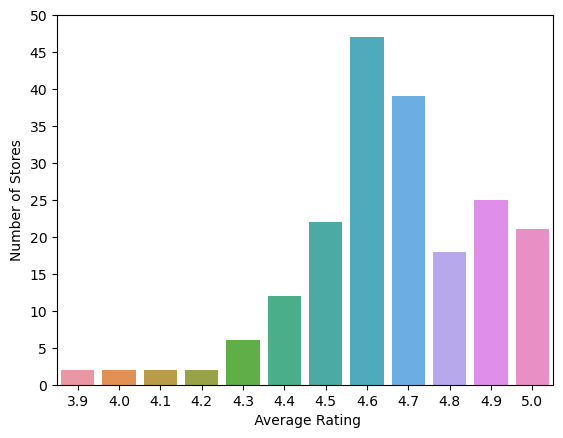

In [32]:
store_ratings = (coffee_cleaned
    .query('Rating > 0')['Rating']
    .value_counts()
    .sort_index(ascending=False)
    .reset_index()
    .rename(
        columns={'index':'Rating','Rating':'number_of_ratings'})
        )
ax = sns.barplot(x='Rating',y='number_of_ratings', data=store_ratings)
ax = ax.set(xlabel=' Average Rating', ylabel='Number of Stores', yticks=range(0,55,5))
store_ratings['number_of_ratings'].describe()

### Observation
- From the above bar chart, it looks like the most common rating awarded is 4.6 at 47 entries, followed closely by a 4.7 rating at 39 entries
- Ratings of 4.5, 4.9, 5.0 are also closely matched with total entries at 22, 25, and 21 respectively